In [113]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
#parse data 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#label encoding on categorical data 

#FAMA 49CRSP Common Stocks 
df = pd.read_csv('ee6d2f60cdafb550.csv')
df = df.dropna()

In [114]:
import sklearn.preprocessing 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

#preprocessing here
#sort by date 
df = df.sort_values(by = 'public_date', ascending = True)

#encode integer categories into numbers 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df.FFI49_desc)
print(integer_encoded)
df.FFI49_desc = integer_encoded
df.divyield_Median = [float(x.strip('%'))/100 for x in df.divyield_Median]
print(df)

#todo: https://www.gsb.stanford.edu/library/articles/databases/links/financial-ratios-suite?fbclid=IwAR0EGNGk9DdxQjEHfdaoUhdY3tNzAWDogYDzuuJi1zT_muL-uJtWQw19Fzk

#get output first 
ewlabels = df.indret_ew
vwlabels = df.indret_vw

#3year on year change as a prediction feature, raw pct change 
yoythree = ewlabels.diff(periods = 3)
#3 years rolling percent change, averaged ie. (y1-y2 + (y3-y2)change)/2 
rollavgpct = ewlabels.rolling(3).mean()

#drop first 3 years
df = df.iloc[3:]
ewlabels = ewlabels.iloc[3:]
yoythree = yoythree.iloc[3:]
#yoypctthree = yoypctthree.iloc[3:]
rollavgpct = rollavgpct.iloc[3:]

#add -1 and 1 so the bins will take on bins to be equal and set to max -1 and 1
#extrema = pd.Series([-1,1])
#ewnlabels = ewlabels.append(extrema)

#make a new output (bucket by percentage?)
# enc = KBinsDiscretizer(n_bins=8, encode='ordinal',strategy = 'uniform')
# ewnlabels = np.asarray(ewnlabels)
# ewnlabels = ewnlabels.reshape((-1,1))
# labels_binned = enc.fit_transform(ewnlabels)

# labels_binned = labels_binned[:-2]

#1 Split-Timer series data, 0.64 Train, 0.16 dev, 0.2 Test
#x_train, x_test, y_train, y_test = train_test_split(df, labels_binned, test_size = 0.2, shuffle = False)
x_train, x_test, y_train, y_test = train_test_split(df, ewlabels, test_size = 0.2, shuffle = False)
x_tra, x_dev, y_tra, y_dev = train_test_split(x_train, y_train, test_size = 0.2, shuffle = False)

[25 25 25 ... 22 10 47]
       public_date  FFI49_desc  NFIRM  indret_ew  indret_vw  dpr_Median  \
12337     19930831          25      6   0.052904   0.068678       0.460   
12383     19930930          25      6  -0.035253  -0.046242       0.460   
12430     19931031          25      6   0.009319  -0.018318       0.460   
12477     19931130          25      5  -0.022123  -0.014000       0.479   
12524     19931231          25      5   0.096039   0.072342       0.479   
12571     19940131          25      5   0.043779   0.009888       0.479   
12618     19940228          25      6   0.012589   0.039537       0.394   
12665     19940331          25      6  -0.012399  -0.052069       0.394   
12712     19940430          25      6  -0.026779  -0.024747       0.394   
12759     19940531          25      6  -0.001201   0.023906       0.394   
12806     19940630          25      6  -0.001294  -0.037881       0.394   
12853     19940731          25      6   0.023423   0.043118       0.394   
1

In [115]:
print(x_train['public_date'])

12477    19931130
12524    19931231
12571    19940131
12618    19940228
12665    19940331
12712    19940430
12759    19940531
12806    19940630
12853    19940731
12900    19940831
12947    19940930
12994    19941031
13041    19941130
13088    19941231
13135    19950131
13182    19950228
13229    19950331
13276    19950430
13323    19950531
13370    19950630
13417    19950731
13464    19950831
13511    19950930
13558    19951031
13605    19951130
13652    19951231
13699    19960131
13745    19960229
13791    19960331
13837    19960430
           ...   
23058    20130331
23056    20130331
23035    20130331
23036    20130331
23037    20130331
23038    20130331
23039    20130331
23040    20130331
23041    20130331
23042    20130331
23043    20130331
23044    20130331
23057    20130331
23046    20130331
23047    20130331
23049    20130331
23050    20130331
23051    20130331
23052    20130331
23053    20130331
23054    20130331
23055    20130331
23045    20130331
23113    20130430
23112    2

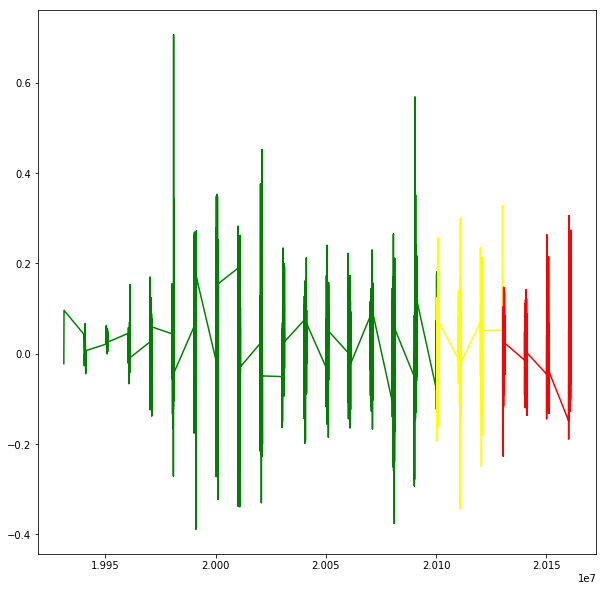

In [116]:
from matplotlib import pyplot

fig1 = pyplot.figure(1, figsize = (10,10))
pyplot.plot(x_tra['public_date'], y_tra, color = 'green')
pyplot.plot(x_dev['public_date'], y_dev, color = 'yellow')
pyplot.plot(x_test['public_date'], y_test, color = 'red')
pyplot.show()

In [88]:
#tutorial keras practice
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/


#####IGNORE THIS!!!!!!!!
from keras.models import Sequential
from keras.layers import Dense, Activation,Softmax
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import numpy

model = Sequential()
#parameters = number of neurons, initialization method, activation function
model.add(Dense(32, input_dim=76, init = 'uniform', activation = 'relu'))
model.add(Dense(16, init = 'uniform', activation = 'relu'))
model.add(Dense(1, init = 'uniform', activation = 'sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_tra, y_tra, epochs=25, batch_size=32)


print("----------------------------------------------------------")
scores = model.evaluate(x_tra,y_tra)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

y_devpred = model.predict(x_dev)
print("--------------------------------------------")
print(mean_squared_error(y_dev,y_devpred))

C:\Users\carol\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=76, activation="relu", kernel_initializer="uniform")`
  
C:\Users\carol\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\carol\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  app.launch_new_instance()


Epoch 1/25
5948/5948 [==============================] - 1s 235us/step - loss: 57.5813 - acc: 0.0000e+00
Epoch 2/25
5948/5948 [==============================] - 1s 86us/step - loss: 57.5813 - acc: 0.0000e+00
Epoch 3/25
5948/5948 [==============================] - 1s 101us/step - loss: 57.5813 - acc: 0.0000e+00
Epoch 4/25
5948/5948 [==============================] - 1s 126us/step - loss: 57.5813 - acc: 0.0000e+00
Epoch 5/25
5948/5948 [==============================] - 1s 96us/step - loss: 57.5813 - acc: 0.0000e+00
Epoch 6/25
5948/5948 [==============================] - 0s 81us/step - loss: 57.5813 - acc: 0.0000e+00
Epoch 7/25
5948/5948 [==============================] - 1s 85us/step - loss: 57.5813 - acc: 0.0000e+00
Epoch 8/25
5948/5948 [==============================] - 0s 58us/step - loss: 57.5813 - acc: 0.0000e+00
Epoch 9/25
5948/5948 [==============================] - 0s 77us/step - loss: 57.5813 - acc: 0.0000e+00
Epoch 10/25
5948/5948 [==============================] - 1s 90us/step 

Epoch 1/50
5948/5948 [==============================] - 2s 417us/step - loss: 89.3470 - mean_squared_error: 89.3470 - mean_absolute_error: 1.3221 - mean_absolute_percentage_error: 12862.5044 - cosine_proximity: -0.0166 - acc: 1.6812e-04
Epoch 2/50
5948/5948 [==============================] - 1s 92us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 10959.1065 - cosine_proximity: -0.0355 - acc: 1.6812e-04
Epoch 3/50
5948/5948 [==============================] - 1s 115us/step - loss: 0.0095 - mean_squared_error: 0.0095 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 20053.0535 - cosine_proximity: -0.0261 - acc: 1.6812e-04
Epoch 4/50
5948/5948 [==============================] - 1s 108us/step - loss: 0.0115 - mean_squared_error: 0.0115 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 16812.1321 - cosine_proximity: -0.0339 - acc: 1.6812e-04
Epoch 5/50
5948/5948 [==============================] - 1s 

5948/5948 [==============================] - 0s 83us/step - loss: 0.0064 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 1545.7822 - cosine_proximity: -0.1417 - acc: 1.6812e-04
Epoch 36/50
5948/5948 [==============================] - 1s 110us/step - loss: 0.0064 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 1479.7166 - cosine_proximity: -0.1417 - acc: 1.6812e-04
Epoch 37/50
5948/5948 [==============================] - 1s 155us/step - loss: 0.0064 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 1495.7024 - cosine_proximity: -0.1417 - acc: 1.6812e-04
Epoch 38/50
5948/5948 [==============================] - 1s 148us/step - loss: 0.0064 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 1477.3905 - cosine_proximity: -0.1417 - acc: 1.6812e-04
Epoch 39/50
5948/5948 [==============================] - 1s 118us/step - 

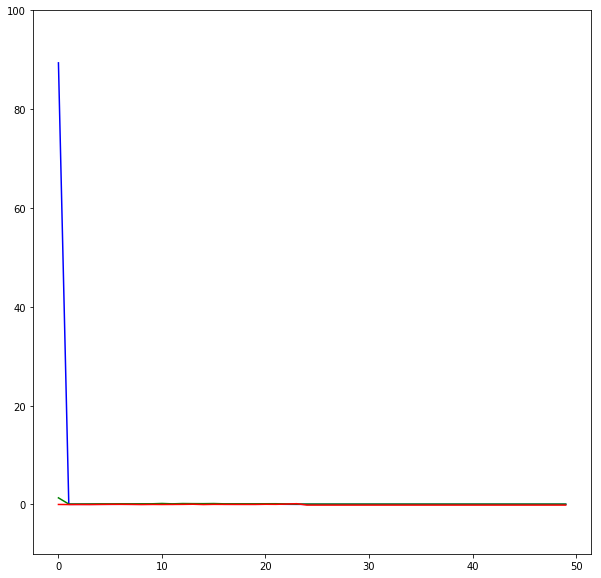

----------------------------------------------------------
1487/1487 [==============================] - 1s 850us/step

loss: 0.46%

mean_squared_error: 0.46%

mean_absolute_error: 4.96%

mean_absolute_percentage_error: 13572.55%

cosine_proximity: -23.74%

acc: 0.00%


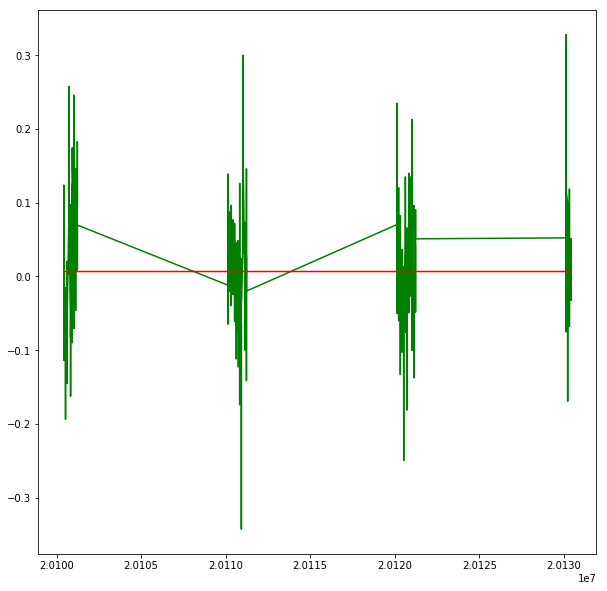

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
1859/1859 [==============================] - 0s 103us/step

loss: 0.25%

mean_squared_error: 0.25%

mean_absolute_error: 3.85%

mean_absolute_percentage_error: 18726.75%

cosine_proximity: -17.70%

acc: 0.00%


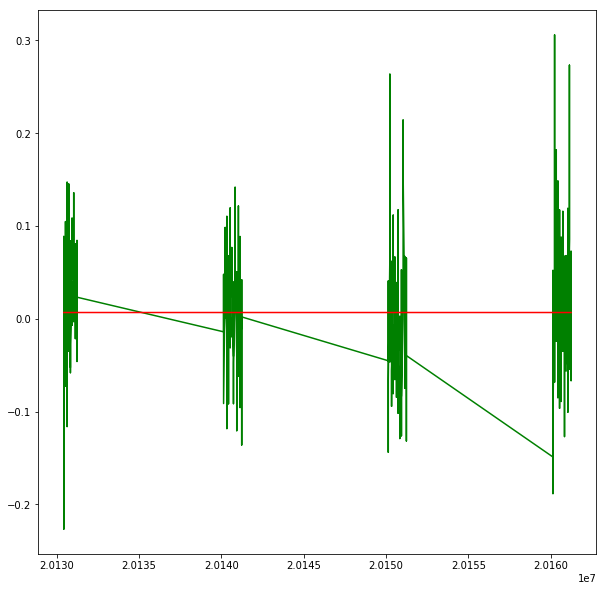

In [117]:
#Regression Model:
#1 Layer: 76 -> 12.78% and 15.28%
#2 Layer: 76,1 -> 0.40% and 0.48%
#3 Layers: 76, 32, 1 -> 0% and 65%
#4 layers: 76,48,32,1 + adam +  -> 60.52% and 56.70%
#4 Layers: 76,32,16,1 -> 61.33% and 57.18%
#4 Layers: 76,32,8,1 -> 0%
#4 layers: 76,48,8,1 -> 0%
#6 layers: 76,48,32,16,8,1 -> 20% and 0%

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import seaborn as sns


model = Sequential()
#parameters = number of neurons, initialization method, activation function
model.add(Dense(76, input_dim=76, kernel_initializer='normal', activation='relu'))
model.add(Dense(48, kernel_initializer='normal',activation = 'relu'))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(Dense(16, kernel_initializer='normal',activation = 'relu'))
model.add(Dense(8, kernel_initializer='normal',activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation = 'linear'))
    
# Compile model
#opt = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
history = model.fit(np.asarray(x_tra), y_tra, epochs=50)

fig2 = pyplot.figure(2,figsize = (10,10))
pyplot.plot(history.history['mean_squared_error'], color = 'blue')
pyplot.plot(history.history['mean_absolute_error'], color = 'green')
pyplot.plot(history.history['mean_absolute_percentage_error'], color = 'orange')
pyplot.plot(history.history['cosine_proximity'], color = 'red')
pyplot.ylim(-10,100)
pyplot.show()

#dev set
print("----------------------------------------------------------")
dev_predictions = model.predict(x_dev) 
scores = model.evaluate(np.asarray(x_dev),y_dev)
for i in range(len(scores)):
    print("\n%s: %.2f%%" % (model.metrics_names[i], scores[i]*100))

fig3 = pyplot.figure(3, figsize = (10,10))
pyplot.plot(x_dev['public_date'], y_dev, color = 'green')
pyplot.plot(x_dev['public_date'], dev_predictions, color = 'red')
pyplot.show()

#test set
print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
test_predictions = model.predict(x_test) 
scores = model.evaluate(np.asarray(x_test),y_test)
for i in range(len(scores)):
    print("\n%s: %.2f%%" % (model.metrics_names[i], scores[i]*100))

fig4 = pyplot.figure(4, figsize = (10,10))
pyplot.plot(x_test['public_date'], y_test, color = 'green')
pyplot.plot(x_test['public_date'], test_predictions, color = 'red')
pyplot.show()


In [105]:
print(x_test['public_date'])

23114    20130430
23110    20130430
23115    20130430
23120    20130430
23117    20130430
23118    20130430
23119    20130430
23121    20130430
23122    20130430
23123    20130430
23124    20130430
23125    20130430
23105    20130430
23116    20130430
23104    20130430
23126    20130430
23102    20130430
23081    20130430
23082    20130430
23083    20130430
23084    20130430
23085    20130430
23086    20130430
23087    20130430
23088    20130430
23089    20130430
23090    20130430
23103    20130430
23092    20130430
23093    20130430
           ...   
25133    20161231
25134    20161231
25135    20161231
25136    20161231
25137    20161231
25138    20161231
25139    20161231
25124    20161231
25132    20161231
25123    20161231
25110    20161231
25120    20161231
25141    20161231
25098    20161231
25100    20161231
25101    20161231
25102    20161231
25103    20161231
25106    20161231
25122    20161231
25107    20161231
25109    20161231
25111    20161231
25113    20161231
25114    2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import numpy

model = Sequential()
model.add(Dense(32, input_dim=76, init = 'uniform', activation = 'relu'))
model.add(Dense(16, init = 'uniform', activation = 'relu'))
model.add(Dense(8, init = 'uniform', activation = 'softmax'))

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=25, batch_size=32)


print("----------------------------------------------------------")
scores = model.evaluate(x_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
y_devpred = model.predict(x_dev)
print("--------------------------------------------")
print(mean_squared_error(y_dev,y_devpred))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Softmax
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(32, input_shape = (x_train.shape)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

model.fit(x_train, y_train, epochs=5, batch_size=32)
y_devpred = model.predict(x_dev)
print("--------------------------------------------")
print(mean_squared_error(y_dev,y_devpred))
